In [1]:
import pandas as pd

In [2]:
from sklearn.preprocessing import LabelEncoder

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Flatten
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences


2024-10-22 18:41:56.512603: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-22 18:41:56.650138: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-22 18:41:56.703479: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-22 18:41:56.718566: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-22 18:41:56.821553: I tensorflow/core/platform/cpu_feature_guar

In [4]:
df_train = pd.read_csv('train/train_text_seq.csv')
df_valid = pd.read_csv('valid/valid_text_seq.csv')

# Extract input sequences and labels
X_train = df_train['input_str'].values
y_train = df_train['label'].values
X_valid = df_valid['input_str'].values
y_valid = df_valid['label'].values

# Encode the digits using LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(list('0123456789'))

# Convert input_str into sequences of encoded digits, removing the first three zeroes
def encode_sequence(sequence):
    return label_encoder.transform(list(sequence.lstrip('0')))  # Remove leading zeroes

X_train_encoded = [encode_sequence(seq) for seq in X_train]
X_valid_encoded = [encode_sequence(seq) for seq in X_valid]

# Pad the sequences to ensure they all have the same length (47 in this case)
X_train_padded = pad_sequences(X_train_encoded, maxlen=47, padding='post')
X_valid_padded = pad_sequences(X_valid_encoded, maxlen=47, padding='post')

# Convert the labels to categorical (0 or 1)
y_train_categorical = to_categorical(y_train, num_classes=2)
y_valid_categorical = to_categorical(y_valid, num_classes=2)

In [5]:
#apply logistic regression to the data
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression()
logreg.fit(X_train_padded, y_train)
y_pred = logreg.predict(X_valid_padded)
print("Accuracy:", accuracy_score(y_valid, y_pred))

Accuracy: 0.5030674846625767


In [35]:
#apply random forest classification on the data
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_padded, y_train)
y_pred = rf.predict(X_valid_padded)
print("Accuracy:", accuracy_score(y_valid, y_pred))

Accuracy: 0.5725971370143149


In [6]:
#apply xgboost classification on the data after instaling xgboost
import xgboost 
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train_padded, y_train)
y_pred = xgb.predict(X_valid_padded)
print("Accuracy:", accuracy_score(y_valid, y_pred))


Accuracy: 0.6053169734151329


In [47]:
model = Sequential()
model.add(Embedding(input_dim=10, output_dim=16, input_length=47))  # 10 unique digits, embedding size 16
model.add(LSTM(32, return_sequences=True))  # Bidirectional LSTM with 32 units, return sequences
model.add(Dropout(0.3))  # Dropout layer to prevent overfitting
model.add(LSTM(16))  # Additional LSTM layer with 16 units
model.add(Dense(16, activation='relu'))  # Dense layer with 16 units
model.add(Dense(2, activation='softmax'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_padded, y_train_categorical,
          validation_data=(X_valid_padded, y_valid_categorical),
          epochs=250, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_valid_padded, y_valid_categorical)
print(f'Validation Loss: {loss}, Validation Accuracy: {accuracy}')
model.summary()

/opt/homebrew/Caskroom/miniconda/base/envs/myenv/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/250
222/222 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.5041 - loss: 0.6929 - val_accuracy: 0.5787 - val_loss: 0.6741
Epoch 2/250
222/222 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.5943 - loss: 0.6654 - val_accuracy: 0.6299 - val_loss: 0.6382
Epoch 3/250
222/222 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.6301 - loss: 0.6412 - val_accuracy: 0.6278 - val_loss: 0.6314
Epoch 4/250
222/222 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.6253 - loss: 0.6397 - val_accuracy: 0.6503 - val_loss: 0.6262
Epoch 5/250
222/222 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.6312 - loss: 0.6358 - val_accuracy: 0.6605 - val_loss: 0.6275
Epoch 6/250
222/222 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.6521 - loss: 0.6256 - val_accuracy: 0.6401 - val_loss: 0.6301
Epoch 7/250
222/222 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.6498 - loss: 0.6205 - val_accuracy: 0.6708 - val_loss: 0.6154
Epoch 8/250
222/222 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.6454 - loss: 0.6276 - 

KeyboardInterrupt: 

In [7]:

model = Sequential()
model.add(Embedding(input_dim=10, output_dim=12, input_length=47))  # Embedding layer with output_dim=12
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))  # Convolutional layer with 32 filters
model.add(MaxPooling1D(pool_size=2))  # Max pooling layer
model.add(Dropout(0.3))  # Dropout layer
model.add(LSTM(24, return_sequences=False))  # LSTM layer with 24 units
model.add(Dense(32, activation='relu'))  # Dense layer with 32 units
model.add(Dense(2, activation='softmax'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_padded, y_train_categorical, 
          validation_data=(X_valid_padded, y_valid_categorical), 
          epochs=250, batch_size=32)

feature_extractor = Sequential(model.layers[:-2])
X_train_features = feature_extractor.predict(X_train_padded)
X_valid_features = feature_extractor.predict(X_valid_padded)
xgb_model = XGBClassifier()
xgb_model.fit(X_train_features, y_train)

# Predict on the validation set
y_pred = xgb_model.predict(X_valid_features)

# Evaluate the accuracy of XGBoost
accuracy = accuracy_score(y_valid, y_pred)
print(f"Validation Accuracy: {accuracy:.4f}")


Epoch 1/250


/home/hardikj/.local/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


222/222 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5175 - loss: 0.6928 - val_accuracy: 0.5644 - val_loss: 0.6876
Epoch 2/250
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5783 - loss: 0.6748 - val_accuracy: 0.6708 - val_loss: 0.6058
Epoch 3/250
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6382 - loss: 0.6299 - val_accuracy: 0.6953 - val_loss: 0.5796
Epoch 4/250
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6809 - loss: 0.5900 - val_accuracy: 0.7280 - val_loss: 0.5530
Epoch 5/250
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7136 - loss: 0.5683 - val_accuracy: 0.7219 - val_loss: 0.5387
Epoch 6/250
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7286 - loss: 0.5350 - val_accuracy: 0.7791 - val_loss: 0.4958
Epoch 7/250
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7377 - loss: 0.5300 - val_accuracy: 0.7751 - val_loss: 0.4913
Epoch 8/250
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7463 - loss: 0.5120 - val_accuracy: 0.7791

In [7]:
model.save_weights('model.weights.h5')

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (32, 47, 12)           │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (32, 45, 32)           │         1,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (32, 22, 32)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (32, 22, 32)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (32, 24)               │         5,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,928 (89.57 KB)

 Trainable params: 7,642 (29.85 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,286 (59.71 KB)

In [24]:
import numpy as np

Model using 80% of dataset

In [26]:
total_samples = len(X_train_padded)
indices = np.arange(total_samples)
np.random.shuffle(indices)
train_size_80_random = int(total_samples* 0.8)
X_train_80 = X_train_padded[:train_size_80_random]
y_train_80 = y_train_categorical[:train_size_80_random]
model = Sequential()
model.add(Embedding(input_dim=10, output_dim=12, input_length=47))  # Embedding layer with output_dim=12
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))  # Convolutional layer with 32 filters
model.add(MaxPooling1D(pool_size=2))  # Max pooling layer
model.add(Dropout(0.3))  # Dropout layer
model.add(LSTM(24, return_sequences=False))  # LSTM layer with 24 units
model.add(Dense(32, activation='relu'))  # Dense layer with 32 units
model.add(Dense(2, activation='softmax'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_80, y_train_80, 
          validation_data=(X_valid_padded, y_valid_categorical), 
          epochs=250, batch_size=32)

# Evaluate the model
loss, accuracy80 = model.evaluate(X_valid_padded, y_valid_categorical)
print(f'Validation Loss: {loss}, Validation Accuracy: {accuracy80}')

/opt/homebrew/Caskroom/miniconda/base/envs/myenv/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/250
222/222 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5058 - loss: 0.6932 - val_accuracy: 0.5174 - val_loss: 0.6891
Epoch 2/250
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5648 - loss: 0.6745 - val_accuracy: 0.6687 - val_loss: 0.6100
Epoch 3/250
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6553 - loss: 0.6229 - val_accuracy: 0.7035 - val_loss: 0.5799
Epoch 4/250
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6747 - loss: 0.5924 - val_accuracy: 0.7423 - val_loss: 0.5426
Epoch 5/250
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7179 - loss: 0.5527 - val_accuracy: 0.7403 - val_loss: 0.5282
Epoch 6/250
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7287 - loss: 0.5332 - val_accuracy: 0.7710 - val_loss: 0.5073
Epoch 7/250
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7456 - loss: 0.5124 - val_accuracy: 0.7648 - val_loss: 0.5003
Epoch 8/250
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7583 - loss: 0.4897 - val_accu

In [27]:
model.save_weights('model.weights.h5')
model.save('model.keras')
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ (None, 47, 12)         │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, 45, 32)         │         1,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_8 (MaxPooling1D)  │ (None, 22, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 22, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 24)             │         5,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,928 (89.57 KB)

 Trainable params: 7,642 (29.85 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,286 (59.71 KB)

Model using 60% of dataset

In [28]:
indices = np.arange(total_samples)
np.random.shuffle(indices)
train_size_60_random = int(total_samples* 0.6)
X_train_60 = X_train_padded[:train_size_60_random]
y_train_60 = y_train_categorical[:train_size_60_random]
model = Sequential()
model.add(Embedding(input_dim=10, output_dim=12, input_length=47))  # Embedding layer with output_dim=12
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))  # Convolutional layer with 32 filters
model.add(MaxPooling1D(pool_size=2))  # Max pooling layer
model.add(Dropout(0.3))  # Dropout layer
model.add(LSTM(24, return_sequences=False))  # LSTM layer with 24 units
model.add(Dense(32, activation='relu'))  # Dense layer with 32 units
model.add(Dense(2, activation='softmax'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_60, y_train_60, 
          validation_data=(X_valid_padded, y_valid_categorical), 
          epochs=250, batch_size=32)

# Evaluate the model
loss, accuracy60 = model.evaluate(X_valid_padded, y_valid_categorical)
print(f'Validation Loss: {loss}, Validation Accuracy: {accuracy60}')

Epoch 1/250


/opt/homebrew/Caskroom/miniconda/base/envs/myenv/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4946 - loss: 0.6933 - val_accuracy: 0.5256 - val_loss: 0.6910
Epoch 2/250
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5241 - loss: 0.6898 - val_accuracy: 0.6401 - val_loss: 0.6368
Epoch 3/250
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6244 - loss: 0.6459 - val_accuracy: 0.6748 - val_loss: 0.6001
Epoch 4/250
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6404 - loss: 0.6300 - val_accuracy: 0.6912 - val_loss: 0.5793
Epoch 5/250
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6474 - loss: 0.6198 - val_accuracy: 0.6933 - val_loss: 0.5704
Epoch 6/250
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6830 - loss: 0.5904 - val_accuracy: 0.7321 - val_loss: 0.5456
Epoch 7/250
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7131 - loss: 0.5650 - val_accuracy: 0.7669 - val_loss: 0.5242
Epoch 8/250
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7112 - loss: 0.5550 - val_accuracy: 0.7505

Model using 40% of dataset

In [26]:
total_samples = len(X_train_padded)
indices = np.arange(total_samples)
np.random.shuffle(indices)
train_size_40_random = int(total_samples* 0.4)
X_train_40 = X_train_padded[:train_size_40_random]
y_train_40 = y_train_categorical[:train_size_40_random]
model = Sequential()
model.add(Embedding(input_dim=10, output_dim=12, input_length=47))  # Embedding layer with output_dim=12
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))  # Convolutional layer with 32 filters
model.add(MaxPooling1D(pool_size=2))  # Max pooling layer
model.add(Dropout(0.3))  # Dropout layer
model.add(LSTM(24, return_sequences=False))  # LSTM layer with 24 units
model.add(Dense(32, activation='relu'))  # Dense layer with 32 units
model.add(Dense(2, activation='softmax'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_40, y_train_40, 
          validation_data=(X_valid_padded, y_valid_categorical), 
          epochs=250, batch_size=32)

# Evaluate the model
loss, accuracy40 = model.evaluate(X_valid_padded, y_valid_categorical)
print(f'Validation Loss: {loss}, Validation Accuracy: {accuracy40}')

Epoch 1/250
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4781 - loss: 0.6932 - val_accuracy: 0.4847 - val_loss: 0.6940
Epoch 2/250
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5075 - loss: 0.6931 - val_accuracy: 0.5153 - val_loss: 0.6901
Epoch 3/250
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5531 - loss: 0.6861 - val_accuracy: 0.6360 - val_loss: 0.6414
Epoch 4/250
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6206 - loss: 0.6492 - val_accuracy: 0.6360 - val_loss: 0.6474
Epoch 5/250
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6340 - loss: 0.6415 - val_accuracy: 0.6912 - val_loss: 0.6036
Epoch 6/250
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6438 - loss: 0.6206 - val_accuracy: 0.6912 - val_loss: 0.5970
Epoch 7/250
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6768 - loss: 0.5983 - val_accuracy: 0.6933 - val_loss: 0.5890
Epoch 8/250
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6873 - loss: 0.5910 - val_accuracy: 0.7096 - v

Model using 20% of dataset

In [25]:
total_samples = len(X_train_padded)
indices = np.arange(total_samples)
np.random.shuffle(indices)
train_size_20_random = int(total_samples* 0.2)
X_train_20 = X_train_padded[:train_size_20_random]
y_train_20 = y_train_categorical[:train_size_20_random]
model = Sequential()
model.add(Embedding(input_dim=10, output_dim=12, input_length=47))  # Embedding layer with output_dim=12
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))  # Convolutional layer with 32 filters
model.add(MaxPooling1D(pool_size=2))  # Max pooling layer
model.add(Dropout(0.3))  # Dropout layer
model.add(LSTM(24, return_sequences=False))  # LSTM layer with 24 units
model.add(Dense(32, activation='relu'))  # Dense layer with 32 units
model.add(Dense(2, activation='softmax'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_20, y_train_20, 
          validation_data=(X_valid_padded, y_valid_categorical), 
          epochs=250, batch_size=32)

# Evaluate the model
loss, accuracy20 = model.evaluate(X_valid_padded, y_valid_categorical)
print(f'Validation Loss: {loss}, Validation Accuracy: {accuracy20}')

Epoch 1/250


/opt/homebrew/Caskroom/miniconda/base/envs/myenv/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.4841 - loss: 0.6943 - val_accuracy: 0.5153 - val_loss: 0.6928
Epoch 2/250
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4618 - loss: 0.6943 - val_accuracy: 0.5153 - val_loss: 0.6927
Epoch 3/250
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5294 - loss: 0.6924 - val_accuracy: 0.5194 - val_loss: 0.6930
Epoch 4/250
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5008 - loss: 0.6932 - val_accuracy: 0.5501 - val_loss: 0.6928
Epoch 5/250
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5104 - loss: 0.6930 - val_accuracy: 0.4847 - val_loss: 0.6930
Epoch 6/250
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4987 - loss: 0.6928 - val_accuracy: 0.4847 - val_loss: 0.6926
Epoch 7/250
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5002 - loss: 0.6917 - val_accuracy: 0.5297 - val_loss: 0.6853
Epoch 8/250
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6108 - loss: 0.6603 - val_accuracy: 0.6074 - val_loss: 0.

In [4]:
import matplotlib as mtpl
from matplotlib import pyplot as plt

Matplotlib is building the font cache; this may take a moment.


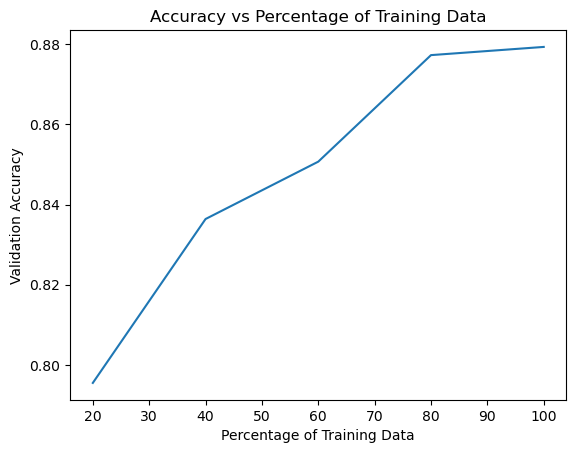

<Figure size 640x480 with 0 Axes>

In [27]:

percentages = [100,80,60,40,20]
accuracies = [accuracy,accuracy80,accuracy60,accuracy40,accuracy20]
#reverse the lists
plt.plot(percentages, accuracies)
plt.xlabel('Percentage of Training Data')
plt.ylabel('Validation Accuracy')
plt.title('Accuracy vs Percentage of Training Data')
plt.show()
#save the plot
plt.savefig('accuracy_vs_percentage.png')